In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
df = pd.read_csv("../data/processed/health_clean_data.csv")

### Relación entre edad (grupo_etareo) y presencia de diagnósticos (tiene_diagnosticos)

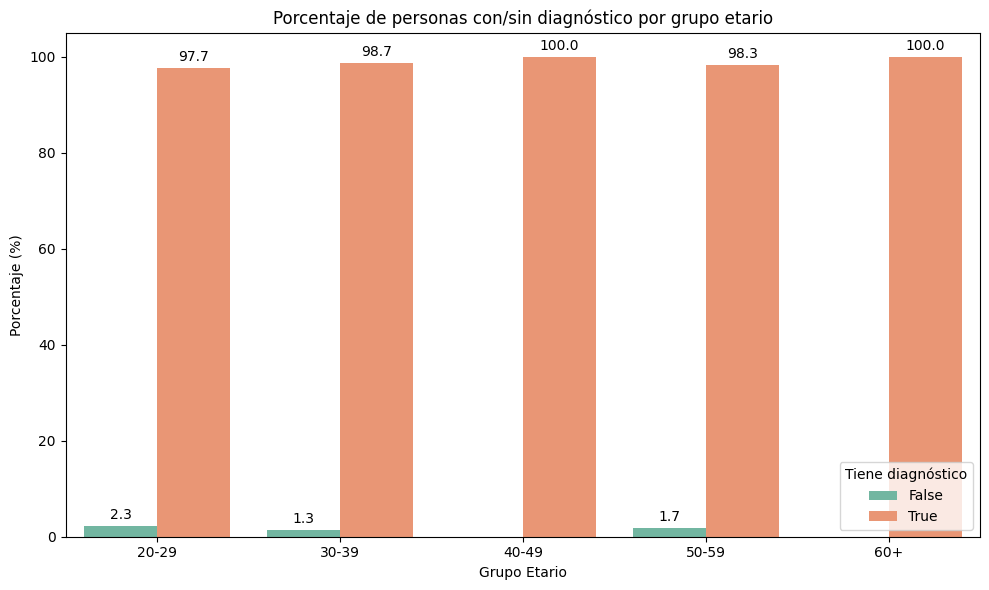

In [27]:
df_plot = df.groupby(['grupo_etareo', 'tiene_diagnosticos']).size().reset_index(name='count')
df_plot['percent'] = df_plot.groupby('grupo_etareo')['count'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df_plot,
    x='grupo_etareo',
    y='percent',
    hue=df_plot['tiene_diagnosticos'].map({0: 'False', 1: 'True'}),
    palette='Set2'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title('Porcentaje de personas con/sin diagnóstico por grupo etario')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Grupo Etario')
plt.legend(title='Tiene diagnóstico')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Edad + Estilo de vida vs Diagnóstico

In [53]:
pd.set_option('display.max_columns', None)
df[df["fuma"] == 1] # solo una persona fuma

,genero,fecha_nacimiento,edad,grupo_etareo,sede,cedula,hemo,fecha_de_examen,estado_civil,escolaridad,profesion,estrato,ndependientes,area,fuma,t_fumar,ante_fumar,tiempo_ante_fumar,tiempo_abstinencia_fumar,bebealcohol,frec_alcohol,tiempo_beber,ante_alcohol,tiempo_abstinencia_alcohol,actifisica,tipo_actifisica,frec_actifisica,tact_fisica,horas_sueno,siesta,duracion_siesta,tipo_examen,signos_vitales_tensionarterialsistolica,signos_vitales_tensionarterialdiastolica,signos_vitales_pulso,signos_vitales_frecuenciacardiaca,signos_vitales_frecuenciarespiratoria,signos_vitales_talla,signos_vitales_peso,signos_vitales_dominancia,signos_vitales_contextura,signos_vitales_tensionarterialsistolica_interpretacion,signos_vitales_tensionarterialdiastolica_interpretacion,signos_vitales_interpretacionmedico,signos_vitales_imc,signos_vitales_imc_interpretacion,diagnostico_1,diagnostico_2,diagnostico_3,atenciones,dias_perdidos,enfermedades_del_ojo_y_sus_anexos,sintomas,signos_y_hallazgos_anormales_clinicos_y_de_laboratorio,no_clasificados_en_otra_parte,enfermedades_del_sistema_osteomuscular_y_del_tejido_conectivo,enfermedades_endocrinas,es_mayor_50,tiene_diagnosticos,multiples_diagnosticos,riesgo_enfermedades_laborales,dias_perdidos_alto,diagnostico_principal_categoria
7,m,1969-04-20,58.0,50-59,bogota,288767068.0,o+,2024-08-11,casado(a),tecnico,unknown,5.0,1.0,unknown,1.0,0.0,0.0,1.0,2.0,1.0,unknown,14.0,1.0,2.0,1.0,unknown,unknown,3.0,1.0,0.0,0.313693,periodico,59.0,87.0,8.0,8.0,2.0,103.0,37.0,unknown,unknown,prehipertension,unknown,normal,11.31,normal,j303,j304,unknown,8.0,8.0,False,False,False,True,True,False,1,1,1,1,0,J


In [29]:
df[df["actifisica"] == 1]

,genero,fecha_nacimiento,edad,grupo_etareo,sede,cedula,hemo,fecha_de_examen,estado_civil,escolaridad,...,signos_y_hallazgos_anormales_clinicos_y_de_laboratorio,no_clasificados_en_otra_parte,enfermedades_del_sistema_osteomuscular_y_del_tejido_conectivo,enfermedades_endocrinas,es_mayor_50,tiene_diagnosticos,multiples_diagnosticos,riesgo_enfermedades_laborales,dias_perdidos_alto,diagnostico_principal_categoria
0,m,1972-11-02,54.0,50-59,barranquilla,3.707759e+08,o+,2024-08-23,casado(a),tecnologico,...,True,False,False,False,1,1,1,1,0,Z
1,m,1977-09-06,49.0,40-49,barranquilla,3.714480e+08,a+,2024-09-08,casado(a),tecnico,...,False,False,False,False,0,1,1,1,0,L
2,m,1982-07-25,44.0,40-49,barranquilla,7.172340e+08,unknown,2024-12-05,casado(a),universitario,...,False,True,True,False,0,1,1,1,0,H
3,f,1990-08-12,34.0,30-39,cali,1.030179e+09,o+,2024-11-18,soltero(a),universitario,...,False,False,False,False,0,1,1,1,1,M
6,m,2003-02-15,21.0,20-29,cali,6.030673e+08,o+,2024-10-12,casado(a),universitario,...,False,True,True,True,0,1,1,1,1,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,m,1989-10-27,34.0,30-39,cali,5.123322e+08,o-,2024-10-03,soltero(a),universitario,...,True,False,False,False,0,1,1,1,0,E
273,m,1994-04-30,30.0,30-39,barranquilla,9.463957e+08,b+,2024-11-24,union libre,universitario,...,False,False,False,False,0,1,1,0,0,H
275,m,1961-11-02,64.0,60+,barranquilla,1.525920e+08,o+,2024-12-04,casado(a),tecnologico,...,True,False,False,False,1,1,1,1,0,NaN
276,m,1978-07-27,47.0,40-49,barranquilla,2.036595e+08,o+,2024-08-03,casado(a),postgrado,...,False,False,False,False,0,1,1,0,1,E


c:\Users\ADMIN\Desktop\Empathy\Empathy-Challenge\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ADMIN\Desktop\Empathy\Empathy-Challenge\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


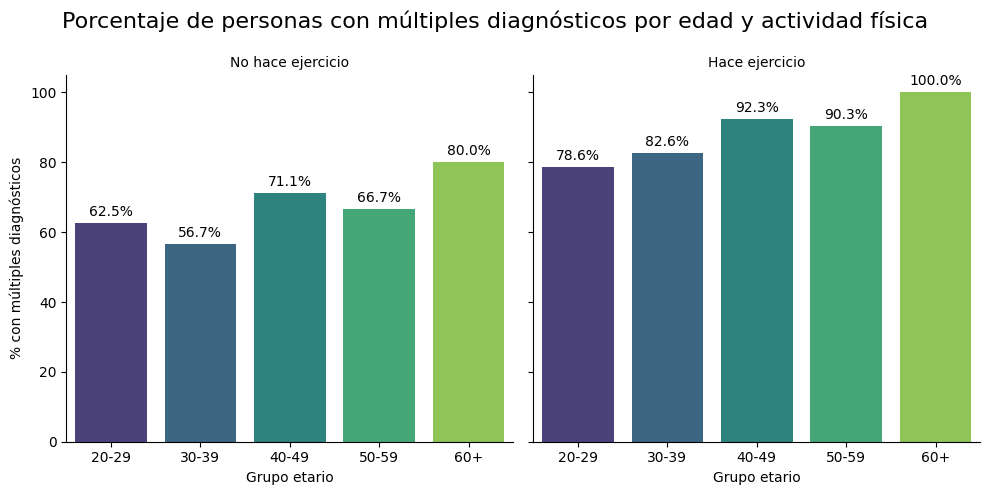

In [30]:
df_plot = df[df['grupo_etareo'].notna() & df['actifisica'].isin([0, 1])]

df_grouped = df_plot.groupby(['grupo_etareo', 'actifisica'])['multiples_diagnosticos'].agg(
    total='count',
    con_multiples='sum'
).reset_index()

df_grouped['porcentaje_multiples'] = (df_grouped['con_multiples'] / df_grouped['total']) * 100
df_grouped['actifisica_label'] = df_grouped['actifisica'].map({0: 'No hace ejercicio', 1: 'Hace ejercicio'})

g = sns.FacetGrid(df_grouped, col='actifisica_label', sharey=True, height=5, aspect=1)
g.map_dataframe(sns.barplot, x='grupo_etareo', y='porcentaje_multiples', palette='viridis')

g.set_axis_labels("Grupo etario", "% con múltiples diagnósticos")
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Porcentaje de personas con múltiples diagnósticos por edad y actividad física", fontsize=16)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.show()


### Heatmap de correlaciones entre estilo de vida y variables de salud 

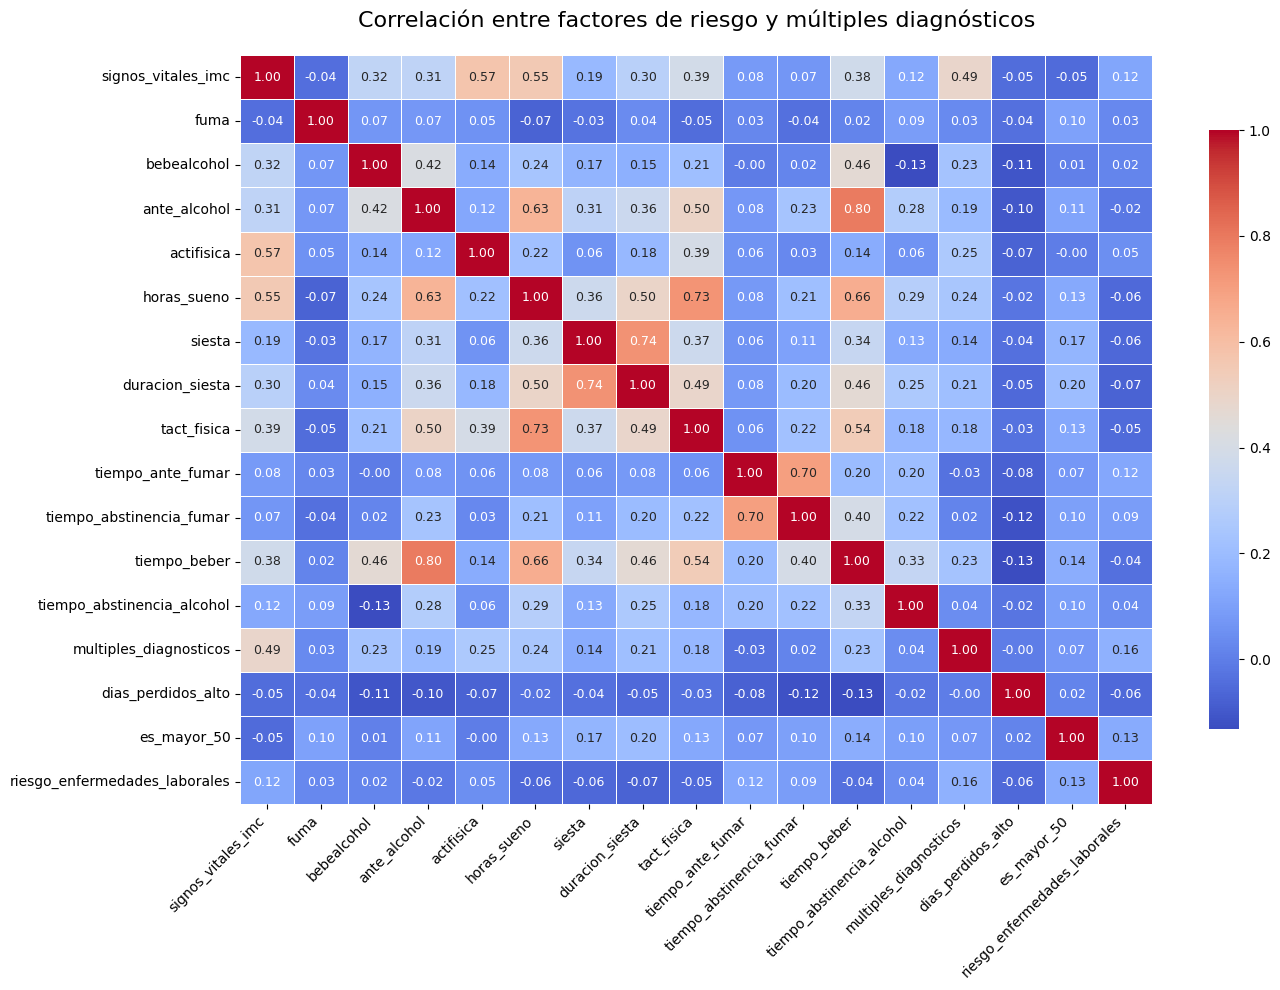

In [70]:
variables = [
    # Target
    "signos_vitales_imc", # tras análisis de correlación, ninguna variable tiene correlación fuerte directa. Esto sugiere un problema complejo que no se explica solo con estilo de vida (al menos con los datos actuales)

    "fuma", "bebealcohol", "ante_alcohol", "actifisica",
    "horas_sueno", "siesta", "duracion_siesta", "tact_fisica",
    "tiempo_ante_fumar", "tiempo_abstinencia_fumar",
    "tiempo_beber", "tiempo_abstinencia_alcohol","multiples_diagnosticos", 
    "dias_perdidos_alto", "es_mayor_50", 
    "riesgo_enfermedades_laborales"
]

df_corr = df[variables].dropna()

corr_matrix = df_corr.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=False, 
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9} 
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlación entre factores de riesgo y múltiples diagnósticos", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

